<a href="https://colab.research.google.com/github/delferns2001/FYP/blob/master/10H_tutorial_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a larger example (Multiclass Classification)

When you have more then two classes as a option, its known as **multiclass classification**. (anything more then 2 classes)

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothing. 

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

# The data has already been stored into training and test sets for us 

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample:\n {train_data[0]} \n")
print(f"Training label:\n {train_labels[0]} \n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of the first example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

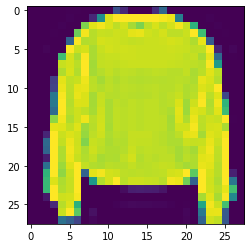

In [ ]:
# Plot a single image 
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [ ]:
# Check the label 

train_labels[7]

2

In [ ]:
# Create a small list so we can index onto out training labels so they're human readable

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
len(class_names)

10

In [ ]:
# Plot an example image and its label

def plot_image(index):
  plt.imshow(train_data[index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[index]])

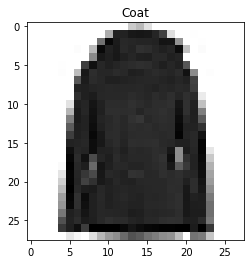

In [ ]:
plot_image(2000)

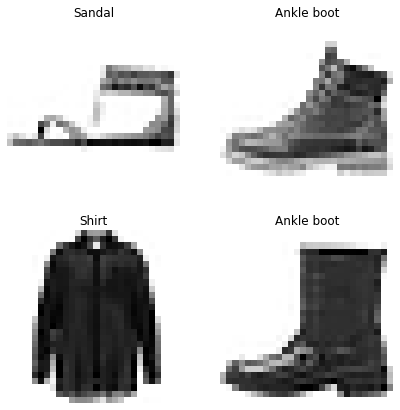

In [ ]:
# Plot multiple random images of fashion MNIST

import random 
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a Multiclass Classification Model 

For the multiclass classification model, we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things: 
* input shape = 28 x 28 (the shape of one image)
* output shape = 10 (one per class of clothing) 
* Loss function = tf.keras.losses.CathogoricalCrossentropy()
  * if your labels are one-hot encoded, use `CathogoricalCrossEntropy()`
  * if your label are **not** one-hot encoded, then use `SparseCathogoricalCrossentropy()`
* Output layer activation fucntion = Softmax (not sigmoid)



In [ ]:
# Our data needs to be flattened from(28,28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])
flatten_model.output_shape

(None, 784)

**Note**: When the data is not *OneHotEncoded*, we shoud use *`SparseCategoricalCrossentropy()`* rather then *`CategoricalCrossentropy()`*

In [ ]:
from matplotlib.cbook import flatten
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model 

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(10, activation = "softmax")

])

# 2. Compile the model 
model_11.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth = 10),
                                epochs = 10,
                                validation_data = (test_data,
                                                   tf.one_hot(test_labels, depth = 10)))



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy

In [ ]:
# Check the model summary

model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data 

train_data.min(), train_data.max()

(0, 255)

🔑 Neural Networks prefer data to be scaled (or normalised), this means they like to have numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by deviding by the maximum

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data 
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
from matplotlib.cbook import flatten
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model 

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model 
model_12.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data_norm,
                                                   test_labels))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

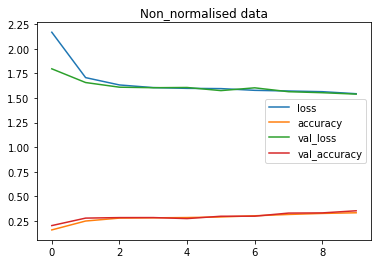

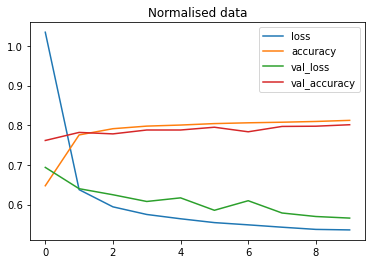

In [ ]:
# Plotting the two models
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non_normalised data")
pd.DataFrame(norm_history.history).plot(title="Normalised data")

🔑 **Note** The same model with slightly different data can produce drumatically different results. so when you're comparing models, its important to make sure you're comparing them on the same criteria (example same architecture but different data or same dat but different architecture)

## Finding the Ideal learning rate

In [ ]:
#Set random seed
tf.random.set_seed(42)

# Create model

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax"),
])

# Compile the model
model_13.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics = ["accuracy"])

#Create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40, 
                               validation_data = (test_data_norm,test_labels),
                               callbacks = [lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

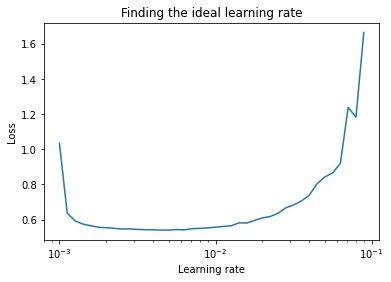

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()


The ideal learning rate is a little before the minimum point, in this case 10**-3

In [ ]:
10**-3

0.001

In [ ]:
# Lets refit a model with the ideal learning rate

# Set random seed 
tf.random.set_seed(42)

# Create model 

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(10, activation = "softmax")                     
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model 

To evaluate our multi-class classification model we could: 
* Evaluating its performance using other classification metrics (such as confusion metrix)
* Assess some of its predictions (through visualisation) 
* Save and export it for use in an application


Lets go through the top 2.......

In [ ]:
# Confusion matrix


# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matix function

import itertools 
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  #Create the confusion matrix

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1) [:, np.newaxis] # normalise the confusion mmatrix
  n_classes = cm.shape[0]

  #Lets prettify it
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes: 
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Labes",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels, 
        yticklabels = labels
  )

  # Set x-axis label to the bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size 
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)



  # Set the threshold for different colors 
  threshold = (cm.max() + cm.min()) / 2

  # Plot the test on each cell 
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = text_size)




In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model 

y_probs = model_14.predict(test_data_norm)

#view the first 5 predictions 
y_probs[:5]


array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
# Convert all of the predictions probabilities into integers
y_pred = y_probs.argmax(axis = 1)

# View the first 10 predictions label
y_pred[10:]

array([4, 5, 5, ..., 3, 1, 5])

In [ ]:
y_pred == y_probs.argmax(axis = 1)

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Sklearn's confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_pred)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [ ]:
len(test_data_norm), len(test_labels)

(10000, 10000)

In [ ]:
test_labels[0]

9

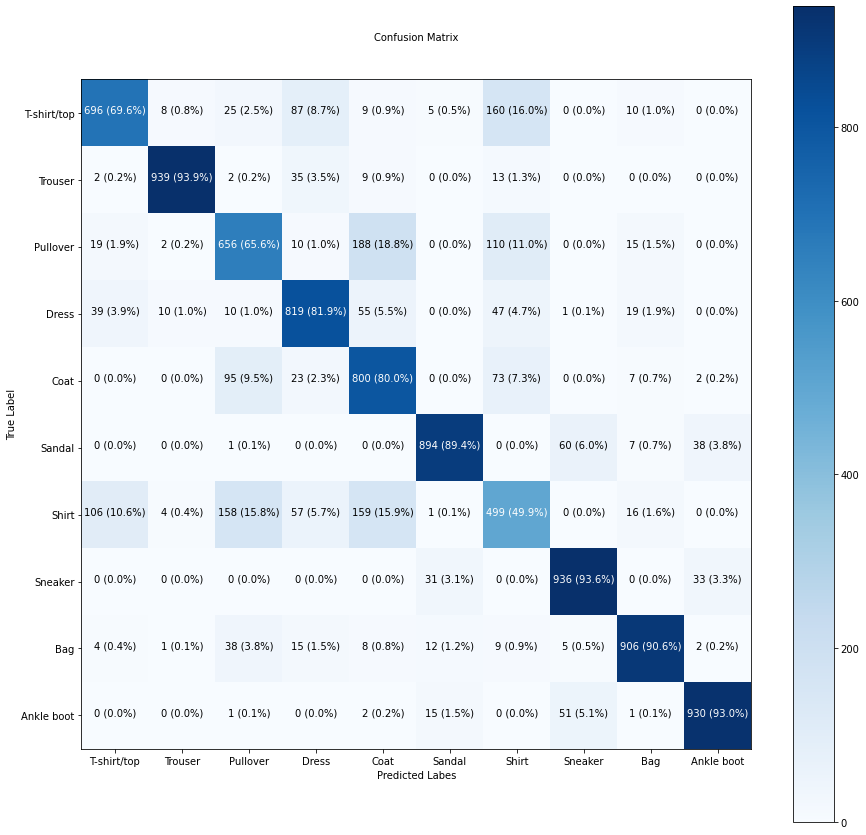

In [ ]:
# confusion matrix created by daniel bourke

make_confusion_matrix(y_true=test_labels,
                      y_pred = y_pred ,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

We can use confusion marix to help us understand where the model is making mistakes.

> 🔑 **Note** Often when working with images and other forms of visual data, its a good idea to visualise as much as possible to devalop a further understanding of the data, input and outputs of your model 

How about we create a fun little function for: 
* Plot a random image 
* Make a prediction on said image 
* Label the plt with truth label & the predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with the prediction and true labels
  """
  # Random integer
  i = random.randint(0, len(images))

  # Create apredictions and targets 
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the colour of the titles depending on if the predictions is write or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color = color)
   



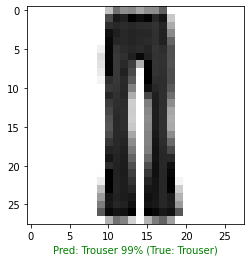

In [ ]:
# Check out a random image as well as its predictions
plot_random_image(model = model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model 

model_14.layers